In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TMAX = 1.e5

k1 = 0.01
k2 = 1.

def evolve_gillespie(A, t):
	# reaction 1: A -> 0
	a1 = k1*A
	# reaction 2: 0 -> A
	a2 = k2
	
	# total rate
	a0 = a1+a2
	
	# choose dt for the next reaction
	dt = np.random.exponential(1./a0)
	t = t+dt
	
	# choose which reaction is next:
	if(np.random.rand() < a1/a0): # reaction 1
		A = A-1
	else:	# reaction 2
		A = A+1
	
	return [A, t]

# timeseries
ts_A = []
ts_t = []

# initial state	
A = 0
t = 0.

while t<TMAX:
	ts_A.append(A)
	ts_t.append(t)
	
	[A, t] = evolve_gillespie(A, t)

# list of time steps
ts_dt = np.array(ts_t[1:])-np.array(ts_t[:-1]) # note that this list has 1 element less (we don't know for how long the last state stays)

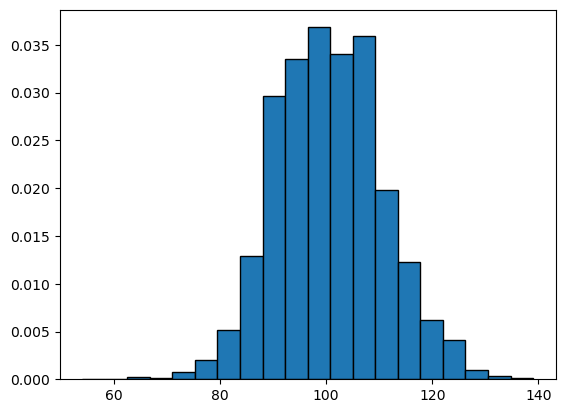

In [3]:
points = len(ts_A)
plt.hist(ts_A[int(points/2):-1], weights=ts_dt[int(points/2):], bins=20, label="histogram",density=True, edgecolor="black")
plt.show()


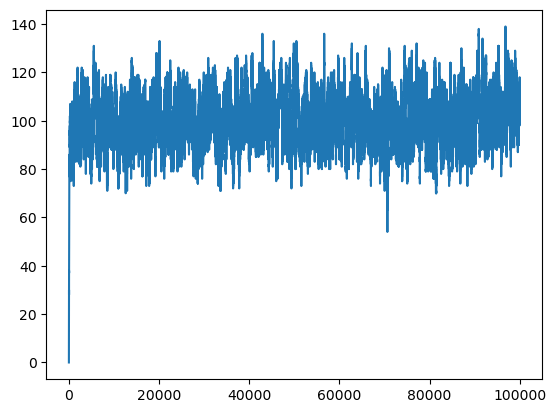

In [4]:
plt.plot(ts_t,ts_A)